# Deck 110 FOSDIC Parse

headerrows all start with 00000110 and provide data regarding tape reels

*80 Columns*

```
1494845040801272--0202120000000000035041367818   322000---00--33943          389
^^^^^YYMMDDHH                      ^^^^^                         ^^          ^^^
|||||                              |||dry                       water         |
||||| lon                          |||bulb                       temp        Ship
||| lat                            |||(F)                         (F)        number
|octant                            press (0-999)                            (0-999)
                                   where 10/9 99.9
```

Octant:  
+ 0-3 -> Northern Hem.
    - 0 -> 0:90W
    - 1 -> 90W:180W
    - 2 -> 180E:90E
    - 3 -> 90E:0
+ 4-7 -> Southern Hem.
    - 4 -> 0:90W
    - 5 -> 90W:180W
    - 6 -> 180E:90E
    - 7 -> 90E:0


In [3]:
import pandas as pd
import numpy as np

import datetime


In [2]:
with open('fosdic_cd110','r') as f:
    file = f.readlines()

In [3]:
counter = 0
data = {}
for count, row in enumerate(file):
    if (row[:8] == '00000110'):
        print(f'Headerlines: {count}')
    else:
        try:
            pressure = int(row[35:38]) / 10.
        except:
            pressure = np.nan
        try:
            datestr = '19'+row[5:7]+'-'+row[7:9]+'-'+row[9:11]+' '+row[11:13]+':00:00'
        except:
            datestr= np.nan
        try:
            octant = int(row[:1])
            lat_str = float(row[1:3])
            lon_str = float(row[3:5])
        except:
            octant = np.nan
            
        if octant == 0:
            NSH_mult = 1
            EWH_mult = -1
        elif octant == 1:
            NSH_mult = 1 
            EWH_mult = -1
        elif octant == 2:
            NSH_mult = 1 
        elif octant == 3:
            NSH_mult = 1    
        elif octant == 4:
            NSH_mult = -1                
        elif octant == 5:
            NSH_mult = -1   
        elif octant == 6:
            NSH_mult = -1               
        elif octant == 7:
            NSH_mult = -1
        else:
            latitude = np.nan
            longitude = np.nan
            
        data.update({counter:{'octant':octant,
                    'latitude':latitude,
                    'longitude':longitude,
                    'year':row[5:7].strip(),
                    'month':row[7:9].strip(),
                    'day':row[9:11].strip(),
                    'hour':row[11:13].strip(),
                    'pressure':pressure,
                    'drybulbF':row[38:40],
                    'watertempF':row[65:67],
                    'wetbulbF':row[63:65],
                    'dewpointF':row[67:69],
                    'shipNo':row[77:].strip('\n'),
                    'datetime':datestr
                    }})
        counter +=1


Headerlines: 0
Headerlines: 12044
Headerlines: 24168
Headerlines: 36313
Headerlines: 48641
Headerlines: 60719
Headerlines: 72899
Headerlines: 84925
Headerlines: 96746
Headerlines: 109038
Headerlines: 121254
Headerlines: 133604
Headerlines: 145824
Headerlines: 157675
Headerlines: 169406
Headerlines: 181671
Headerlines: 193930
Headerlines: 205927
Headerlines: 217660
Headerlines: 229814
Headerlines: 241923
Headerlines: 253799
Headerlines: 265894
Headerlines: 277964
Headerlines: 290300
Headerlines: 302396
Headerlines: 314537
Headerlines: 326758
Headerlines: 339105
Headerlines: 351321
Headerlines: 363196
Headerlines: 375608
Headerlines: 387859
Headerlines: 400164
Headerlines: 412152
Headerlines: 424482
Headerlines: 436422
Headerlines: 448321
Headerlines: 460446
Headerlines: 472653
Headerlines: 484723
Headerlines: 496939
Headerlines: 508209
Headerlines: 520106
Headerlines: 532252
Headerlines: 544365
Headerlines: 556647
Headerlines: 569048
Headerlines: 581187
Headerlines: 593526
Headerlines: 

In [4]:
df = pd.DataFrame.from_dict(data, orient='index')

In [5]:
#remove empty dates/times
df = df.drop(np.where(df['datetime'] == '19  -  -     :00:00')[0])

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')

In [7]:
for x in df.columns:
    if not x in ['pressure','shipNo','octant','year','month','day','hour','datetime']:
        df[x] = pd.to_numeric(df[x], errors='coerce')

In [8]:
df

,octant,latitude,longitude,year,month,day,hour,pressure,drybulbF,watertempF,wetbulbF,dewpointF,shipNo,datetime
0,1,49.0,48.0,45,04,08,00,NaN,NaN,NaN,NaN,NaN,389,1945-04-08 00:00:00
1,1,49.0,48.0,45,04,08,01,35.0,41.0,43.0,39.0,NaN,389,1945-04-08 01:00:00
2,1,49.0,48.0,45,04,08,02,34.7,40.0,43.0,38.0,NaN,389,1945-04-08 02:00:00
3,1,49.0,48.0,45,04,08,03,33.5,40.0,43.0,38.0,8.0,389,1945-04-08 03:00:00
4,1,49.0,48.0,45,04,08,04,33.0,40.0,43.0,38.0,NaN,389,1945-04-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787673,7,30.0,78.0,47,03,24,20,9.9,73.0,72.0,69.0,NaN,087,1947-03-24 20:00:00
787674,7,30.0,72.0,47,03,23,21,5.7,71.0,71.0,64.0,NaN,087,1947-03-23 21:00:00
787675,7,30.0,72.0,47,03,23,22,6.0,71.0,72.0,63.0,NaN,087,1947-03-23 22:00:00
787676,7,30.0,79.0,47,03,24,22,10.9,73.0,72.0,69.0,NaN,087,1947-03-24 22:00:00


In [2]:
df.to_csv('deck110_thinned.csv')

NameError: name 'df' is not defined

In [4]:
df = pd.read_csv('deck110_thinned.csv')

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,4,5,6,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df

,Unnamed: 0,octant,latitude,longitude,year,month,day,hour,pressure,drybulbF,watertempF,wetbulbF,dewpointF,shipNo,datetime
0,0,1,49.0,48.0,45.0,04,08,0.0,NaN,NaN,NaN,NaN,NaN,389,1945-04-08 00:00:00
1,1,1,49.0,48.0,45.0,04,08,1.0,35.0,41.0,43.0,39.0,NaN,389,1945-04-08 01:00:00
2,2,1,49.0,48.0,45.0,04,08,2.0,34.7,40.0,43.0,38.0,NaN,389,1945-04-08 02:00:00
3,3,1,49.0,48.0,45.0,04,08,3.0,33.5,40.0,43.0,38.0,8.0,389,1945-04-08 03:00:00
4,4,1,49.0,48.0,45.0,04,08,4.0,33.0,40.0,43.0,38.0,NaN,389,1945-04-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787306,787673,7,30.0,78.0,47,3,24,20,9.9,73.0,72.0,69.0,NaN,87,1947-03-24 20:00:00
787307,787674,7,30.0,72.0,47,3,23,21,5.7,71.0,71.0,64.0,NaN,87,1947-03-23 21:00:00
787308,787675,7,30.0,72.0,47,3,23,22,6.0,71.0,72.0,63.0,NaN,87,1947-03-23 22:00:00
787309,787676,7,30.0,79.0,47,3,24,22,10.9,73.0,72.0,69.0,NaN,87,1947-03-24 22:00:00


In [14]:
df.drop(labels=['Unnamed: 0','shipNo'],axis=1).drop_duplicates()

,octant,latitude,longitude,year,month,day,hour,pressure,drybulbF,watertempF,wetbulbF,dewpointF,datetime
0,1,49.0,48.0,45.0,04,08,0.0,NaN,NaN,NaN,NaN,NaN,1945-04-08 00:00:00
1,1,49.0,48.0,45.0,04,08,1.0,35.0,41.0,43.0,39.0,NaN,1945-04-08 01:00:00
2,1,49.0,48.0,45.0,04,08,2.0,34.7,40.0,43.0,38.0,NaN,1945-04-08 02:00:00
3,1,49.0,48.0,45.0,04,08,3.0,33.5,40.0,43.0,38.0,8.0,1945-04-08 03:00:00
4,1,49.0,48.0,45.0,04,08,4.0,33.0,40.0,43.0,38.0,NaN,1945-04-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787306,7,30.0,78.0,47,3,24,20,9.9,73.0,72.0,69.0,NaN,1947-03-24 20:00:00
787307,7,30.0,72.0,47,3,23,21,5.7,71.0,71.0,64.0,NaN,1947-03-23 21:00:00
787308,7,30.0,72.0,47,3,23,22,6.0,71.0,72.0,63.0,NaN,1947-03-23 22:00:00
787309,7,30.0,79.0,47,3,24,22,10.9,73.0,72.0,69.0,NaN,1947-03-24 22:00:00


In [10]:
df_datetime = df.set_index(df.datetime)

In [11]:
print(df.groupby('shipNo').groups.keys())

dict_keys(['   ', '  0', '  1', '  6', '  8', ' 0 ', ' 00', ' 03', ' 05', ' 10', ' 17', ' 29', ' 35', ' 38', ' 58', ' 65', ' 7 ', ' 70', ' 77', ' 88', ' 92', '&&&', ')33', '***', '*98', '--8', '-22', '-24', '-27', '-41', '-53', '-7*', '0 0', '0 4', '0 9', '00 ', '000', '001', '004', '005', '006', '009', '00I', '01 ', '010', '011', '016', '019', '02 ', '020', '021', '028', '029', '03 ', '030', '033', '034', '035', '036', '037', '038', '039', '04 ', '040', '041', '042', '043', '046', '047', '049', '051', '053', '054', '055', '057', '058', '06 ', '060', '063', '064', '069', '078', '079', '08 ', '080', '081', '082', '083', '084', '085', '087', '088', '09 ', '093', '094', '096', '099', '1 3', '1 7', '1-0', '10 ', '100', '101', '105', '106', '107', '108', '11 ', '110', '112', '115', '116', '117', '119', '12 ', '121', '122', '125', '127', '128', '129', '131', '132', '134', '136', '137', '14 ', '140', '142', '143', '146', '148', '149', '15 ', '150', '153', '154', '158', '159', '161', '164', '1

some error id's can be easily fixed eg '8\*8' as '888' or '7&4' as 774 but others are harder to determine... anything with a '-' or a trailing space

so drop the following, id's spaces after numbers, all special characters 

This drops 238 measurements

In [12]:
droplist = ['   ',' 0 ',' 7 ','&&&', ')33', '***', '*98', '--8', '-22', '-24', '-27', '-41', '-53', '-7*',
 '0 0', '0 4', '0 9', '00 ','00I','01 ','02 ','03 ','04 ','06 ','08 ','09 ',
 '1 3', '1 7', '1-0', '10 ','11 ','12 ','14 ','15 ','17 ','18 ',
'2  ', '2 0', '2 7', '2 9', '2-7', '20 ','21 ','22 ','24 ','25 ','26S', '27*','28 ','29 ','2D5',
'3  ', '3 1', '3 3', '3 4', '3 6', '3 9', '3*1', '3*4','31 ','32 ','33 ','34 ','35 ','37 ','38 ','39 ','3A6',
'40 ','42 ','7&4', '77 ', '8*8']

In [119]:
df = df[~df.shipNo.isin(droplist)]
df

,octant,latitude,longitude,year,month,day,hour,pressure,drybulbF,watertempF,wetbulbF,dewpointF,shipNo,datetime
0,1,49.0,48.0,45,04,08,00,NaN,NaN,NaN,NaN,NaN,389,1945-04-08 00:00:00
1,1,49.0,48.0,45,04,08,01,35.0,41.0,43.0,39.0,NaN,389,1945-04-08 01:00:00
2,1,49.0,48.0,45,04,08,02,34.7,40.0,43.0,38.0,NaN,389,1945-04-08 02:00:00
3,1,49.0,48.0,45,04,08,03,33.5,40.0,43.0,38.0,8.0,389,1945-04-08 03:00:00
4,1,49.0,48.0,45,04,08,04,33.0,40.0,43.0,38.0,NaN,389,1945-04-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787673,7,30.0,78.0,47,03,24,20,9.9,73.0,72.0,69.0,NaN,087,1947-03-24 20:00:00
787674,7,30.0,72.0,47,03,23,21,5.7,71.0,71.0,64.0,NaN,087,1947-03-23 21:00:00
787675,7,30.0,72.0,47,03,23,22,6.0,71.0,72.0,63.0,NaN,087,1947-03-23 22:00:00
787676,7,30.0,79.0,47,03,24,22,10.9,73.0,72.0,69.0,NaN,087,1947-03-24 22:00:00


In [14]:
df.groupby('shipNo').count().to_csv('deck110_idsummary.csv')

In [23]:
print(f"Number of unique ship identifiers: {len(df.groupby('shipNo').groups.keys())}")

Number of unique ship identifiers: 325


In [32]:
#output some quick summary stats of dateranges and datacounts
pd.concat([df.groupby('shipNo')['datetime'].min(),df.groupby('shipNo')['datetime'].max(),df.groupby('shipNo')['datetime'].count()],axis=1).to_csv('deck110_id_datespan.csv')

In [46]:
drf = pd.concat([df.groupby('shipNo')['datetime'].min().rename('min'),
                 df.groupby('shipNo')['datetime'].max().rename('max'),
                 df.groupby('shipNo')['datetime'].count().rename('count')],axis=1)

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

(-9497.0, -5479.0)

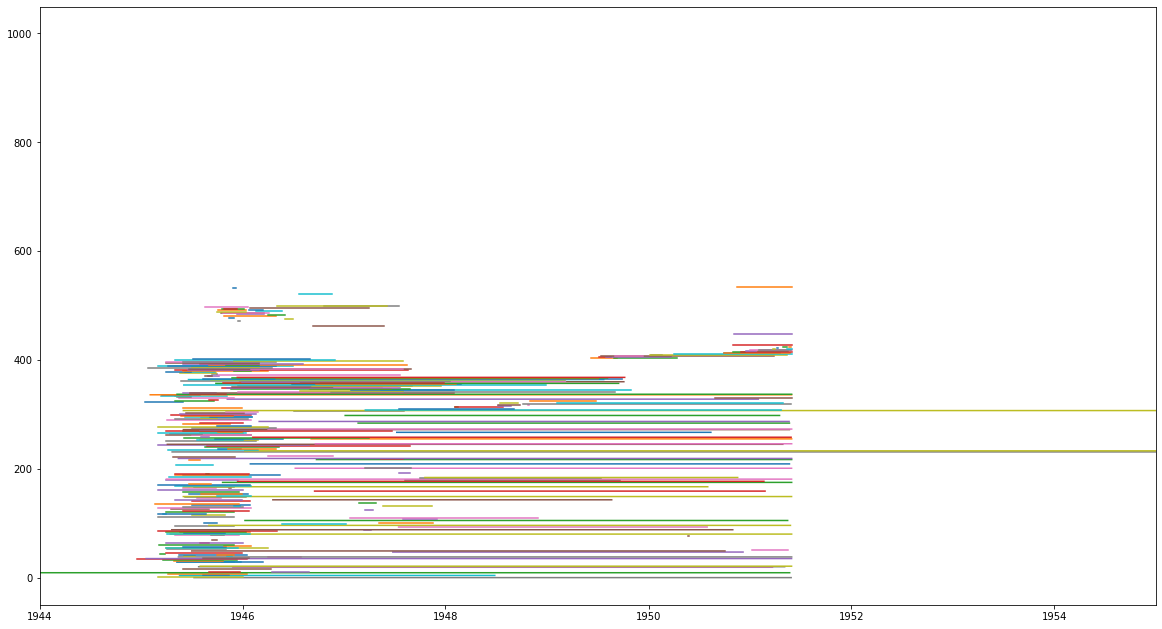

In [118]:
fig,ax = plt.subplots(figsize=(20,11))
for i,row in drf.iterrows():
    try:
        ax.plot(r,
         np.ones(pd.date_range(start=row['min'],end=row['max'],freq='D').shape)*float(row.name))
    except:
        continue
ax.set_xlim([datetime.date(1944,1,1),datetime.date(1955,1,1)])

(-9497.0, -5479.0)

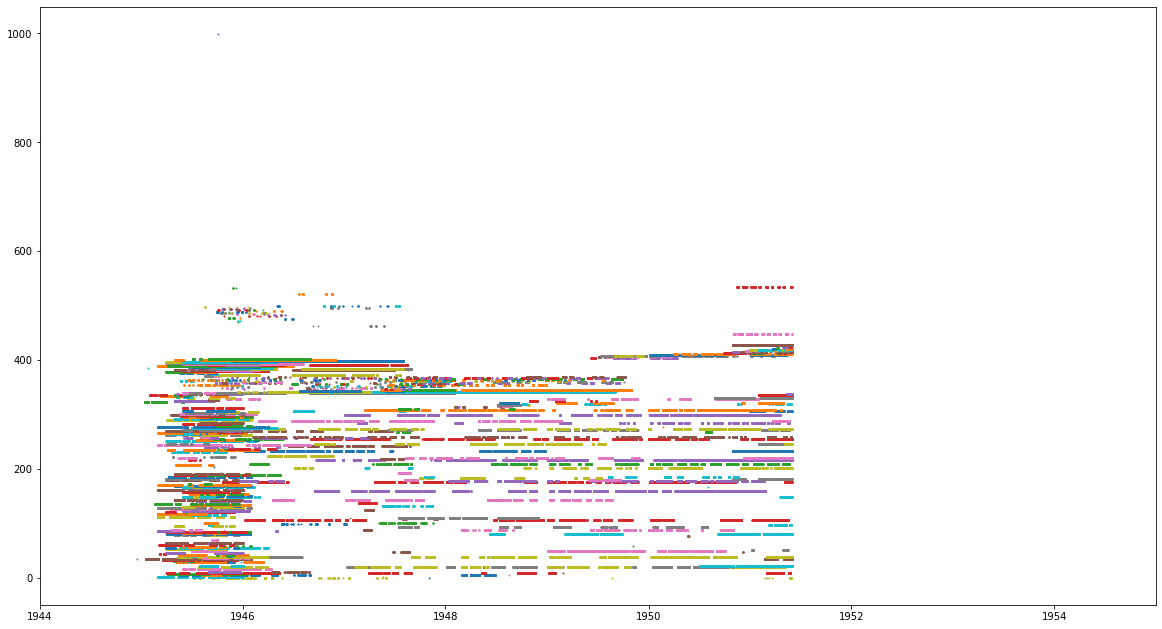

In [136]:
fig,ax = plt.subplots(figsize=(20,11))
for sgroup in df.groupby('shipNo').groups.keys():
    ax.scatter(df.groupby('shipNo').get_group(sgroup).datetime,
             df.groupby('shipNo').get_group(sgroup).shipNo.astype(int),1)
ax.set_xlim([datetime.date(1944,1,1),datetime.date(1955,1,1)])

In [142]:
import seaborn as sns

# sns.pairplot(df)
sns.scatterplot(data=df,x='watertempF',y='drybulbF',hue='shipNo')

<AxesSubplot:xlabel='watertempF', ylabel='drybulbF'>

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x1774e81f0> (for post_execute):


KeyboardInterrupt: 

In [144]:
results = df.groupby('shipNo').describe()
results

latitude                                                    longitude  \
          count       mean       std   min   25%   50%   75%   max     count   
shipNo                                                                         
  0         1.0  33.000000       NaN  33.0  33.0  33.0  33.0  33.0       1.0   
  1         1.0  40.000000       NaN  40.0  40.0  40.0  40.0  40.0       1.0   
  6         1.0  21.000000       NaN  21.0  21.0  21.0  21.0  21.0       1.0   
  8         1.0  21.000000       NaN  21.0  21.0  21.0  21.0  21.0       1.0   
 00         1.0  35.000000       NaN  35.0  35.0  35.0  35.0  35.0       1.0   
...         ...        ...       ...   ...   ...   ...   ...   ...       ...   
500        38.0  44.236842  1.024938  42.0  44.0  44.0  45.0  46.0      38.0   
521        56.0  11.750000  0.639602  11.0  11.0  12.0  12.0  13.0      56.0   
533         5.0  22.000000  0.000000  22.0  22.0  22.0  22.0  22.0       5.0   
534       461.0  33.542299  1.040929  31.0  33.0  34.0  34.0  35.0     461.0   
999         1.0  30.000000       NaN  30.0  30.0  30.0  30.0  30.0       1.0   

                   ... wetbulbF       dewpointF                             \
             mean  ...      75%   max     count       mean       std   min   
shipNo             ...                                                       
  0     18.000000  ...     60.0  60.0       1.0   8.000000       NaN   8.0   
  1     68.000000  ...      NaN   NaN       0.0        NaN       NaN   NaN   
  6     77.000000  ...      7.0   7.0       1.0   0.000000       NaN   0.0   
  8     58.000000  ...     67.0  67.0       1.0   6.000000       NaN   6.0   
 00     73.000000  ...     66.0  66.0       0.0        NaN       NaN   NaN   
...           ...  ...      ...   ...       ...        ...       ...   ...   
500     67.263158  ...     41.0  52.0      37.0   8.594595  1.066132   7.0   
521     61.214286  ...     80.0  83.0       5.0   8.000000  0.707107   7.0   
533     34.000000  ...     72.0  76.0       2.0   8.000000  1.414214   7.0   
534     51.737527  ...     64.0  73.0       0.0        NaN       NaN   NaN   
999     32.000000  ...     70.0  70.0       1.0  99.000000       NaN  99.0   

                                
         25%   50%   75%   max  
shipNo                          
  0      8.0   8.0   8.0   8.0  
  1      NaN   NaN   NaN   NaN  
  6      0.0   0.0   0.0   0.0  
  8      6.0   6.0   6.0   6.0  
 00      NaN   NaN   NaN   NaN  
...      ...   ...   ...   ...  
500      8.0   9.0   9.0  10.0  
521      8.0   8.0   8.0   9.0  
533      7.5   8.0   8.5   9.0  
534      NaN   NaN   NaN   NaN  
999     99.0  99.0  99.0  99.0  

[325 rows x 56 columns]

In [166]:
from pandas import IndexSlice as idx

print(f"ship_ids with > 10 data point: {results[results.loc[:, idx[:, 'count']] > 10].dropna(how='all').shape[0]}")
# location obs < 10
print(f"ship_ids with > 100 data point: {results[results.loc[:, idx[:, 'count']] > 100].dropna(how='all').shape[0]}")
print(f"ship_ids with > 1000 data point: {results[results.loc[:, idx[:, 'count']] > 1000].dropna(how='all').shape[0]}")
print(f"ship_ids with > 10000 data point: {results[results.loc[:, idx[:, 'count']] > 10000].dropna(how='all').shape[0]}")


ship_ids with > 10 data point: 291
ship_ids with > 100 data point: 260
ship_ids with > 1000 data point: 167
ship_ids with > 10000 data point: 17


In [163]:
# results[results.loc[:, idx[:, 'count']] <= 10].dropna(how='all').index

Index(['  0', '  1', '  6', '  8', ' 00', ' 03', ' 05', ' 10', ' 17', ' 29',
       ' 35', ' 38', ' 58', ' 65', ' 70', ' 77', ' 88', ' 92', '037', '039',
       '040', '041', '042', '047', '051', '058', '063', '064', '069', '078',
       '079', '106', '108', '116', '119', '127', '131', '132', '140', '161',
       '166', '187', '193', '204', '207', '236', '240', '264', '268', '277',
       '288', '296', '297', '311', '313', '318', '320', '323', '327', '331',
       '332', '335', '351', '370', '371', '374', '378', '414', '419', '420',
       '421', '422', '423', '424', '448', '463', '470', '471', '477', '478',
       '481', '482', '483', '485', '486', '487', '488', '493', '494', '495',
       '496', '498', '499', '500', '521', '533', '534', '999'],
      dtype='object', name='shipNo')

## Read in ICOADS DECK 110 Data to compare and match to FOSDIC records where possible"